## **Gabriela Aguilar**
### Exploratory Data Analysis of Travel Review Ratings from UC Irvine Machine Learning Repository
### Google reviews on attractions from 24 categories across Europe are considered. Google user rating ranges from 1 to 5 and average user rating per category is calculated.
### El presente proyecto analiza la base de datos "Travel Review Ratings" del repositorio de UC Irvine, con el objetivo de agrupar a los usuarios en “Perfiles de Viajero” según sus patrones de valoración en las distintas categorías de atracciones turísticas, con el fin de identificar segmentos de usuarios que comparten intereses y preferencias similares.

## **Definición del proyecto**
1. **Información base:** Se cuenta con 24 categorías referentes a diferentes tipos de atracciones turísticas en ciudades de Europa.

2. **Metodología:**
Mediante la aplicación de técnicas de clustering (agrupamiento no supervisado), se busca descubrir grupos o perfiles de usuarios que comparten preferencias afines —por ejemplo, usuarios que valoran altamente playas y parques, o aquellos que prefieren museos y actividades culturales. Esta segmentación permitirá:

- Comprender mejor los distintos tipos de viajeros presentes en la base de datos.

- Personalizar recomendaciones de destinos, actividades y promociones para cada perfil.

- Apoyar el diseño de productos turísticos adaptados a los intereses detectados.

- Optimizar estrategias de marketing y comunicación, orientándolas a las motivaciones de cada grupo identificado.

# **1. Acceso e Importación de Datos:**

*   Importación de las librerias necesarias.
*   Decodificación del repositorio de GitHub y acceso a la base de datos en formato CSV.

In [2]:
# Importando todas las librerias necesarias

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(style="whitegrid")
import plotly.express as px # For dynamic graphics
from io import StringIO
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, r2_score, accuracy_score, mean_absolute_error, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression



In [3]:
warnings.filterwarnings('ignore') # Ignorar mensajes de advertencia
plt.rcParams["figure.figsize"] = [10,5] # Tamaño de gráficas

In [4]:
# Carga de los Datos

# Acceso a la base de datos cargada a la repo de GitHub
datos = pd.read_csv("https://github.com/gabrielaaguiv5/ProjectI/raw/main/data/raw/google_review_ratings.csv")

datos.head(10)


,userid,churches,resorts,beaches,parks,theatres,museums,malls,zoos,restaurants,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.00,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
5,User 6,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
6,User 7,0.0,5.0,3.63,3.63,5.0,2.92,3.03,2.35,2.33,...,1.75,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
7,User 8,0.0,5.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,...,1.74,0.60,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
8,User 9,0.0,5.0,3.64,3.64,5.0,2.92,3.03,2.62,2.32,...,0.75,0.60,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
9,User 10,0.0,5.0,3.64,3.64,5.0,2.92,5.00,2.35,2.32,...,0.74,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **2. Análisis Descriptivo:**

*   Revisión del tipo de datos y cantidad de registros.
*   Identificación y tratamiento de valores faltantes o duplicados.
*   Estadísticas descriptivas (media, mediana, desviación estándar, percentiles, etc.).


In [5]:
# Revisión del tipo de datos y cantidad de registros.
datos.info()
print()
print('Datos:', datos.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 5456 non-null   object 
 1   churches               5456 non-null   float64
 2   resorts                5456 non-null   float64
 3   beaches                5456 non-null   float64
 4   parks                  5456 non-null   float64
 5   theatres               5456 non-null   float64
 6   museums                5456 non-null   float64
 7   malls                  5456 non-null   float64
 8   zoos                   5456 non-null   float64
 9   restaurants            5456 non-null   float64
 10  pubs/bars              5456 non-null   float64
 11  local services         5456 non-null   object 
 12  burger/pizza shops     5455 non-null   float64
 13  hotels/other lodgings  5456 non-null   float64
 14  juice bars             5456 non-null   float64
 15  art 

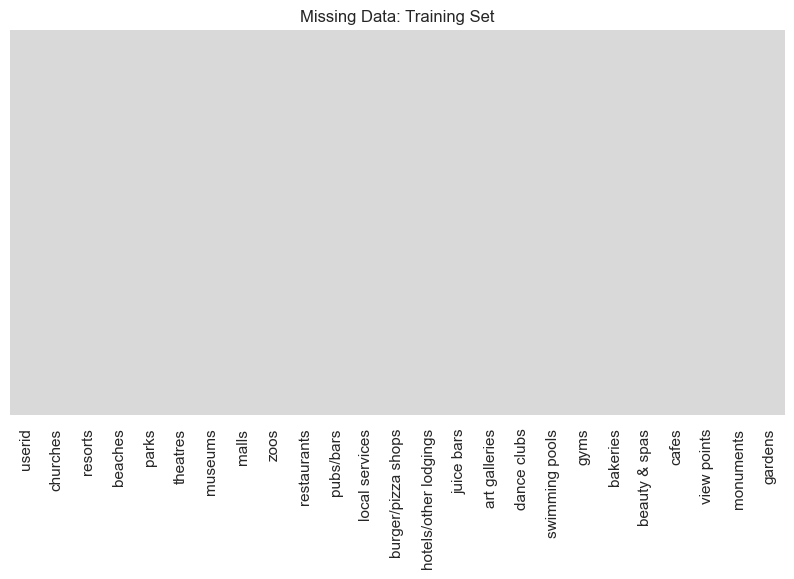

In [6]:
# Heatmap
sns.heatmap(datos.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [7]:
# Identificación de valores faltantes

print(datos.isnull().sum()) # Valores faltantes en cada fila

print()

print("Valores faltantes en la totalidad de la Database:")

print(datos.isnull().any().any()) # Valores faltantes en la totalidad de la Database, revisa cada columna y genera resultado consolidado

userid                   0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoos                     0
restaurants              0
pubs/bars                0
local services           0
burger/pizza shops       1
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
view points              0
monuments                0
gardens                  1
dtype: int64

Valores faltantes en la totalidad de la Database:
True


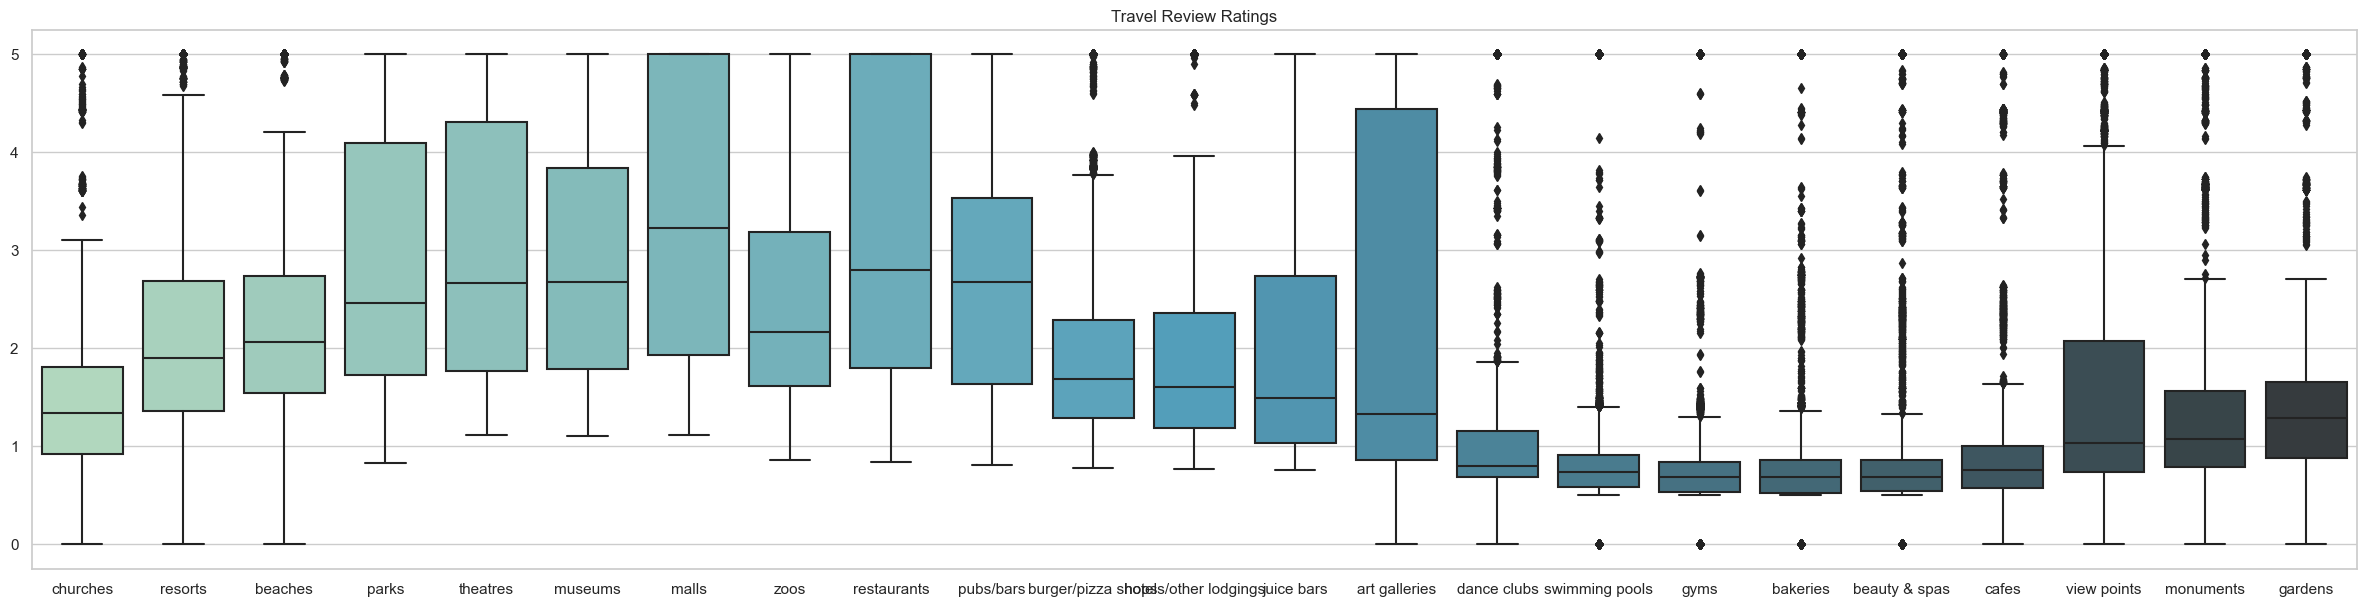

In [8]:
plt.figure(figsize = (30,7))
sns.boxplot(data = datos, palette= 'GnBu_d').set_title('Travel Review Ratings')
plt.show()

Las categorías 'dance clubs', 'swimming pools', 'gyms', 'bakeries', 'beauty & spas', 'cafes', 'view points', 'monuments', 'gardens', 'churches', 'resorts', 'beaches', 'burger/pizza shops' y 'hotels/other lodgings' presentan valores atípicos que se desvían del rango habitual de calificaciones dentro de estas categorías.

Adicionalmente, las categorías 'malls', 'restaurants' y 'art galleries' muestran indicios de calificaciones elevadas, con algunos valores que superan el rango medio.

In [9]:
# Identificación de valores duplicados

print('Filas duplicadas:', datos.duplicated().sum()) # Filas duplicadas

print()

print("Filas duplicadas en la totalidad de la Database:")
print(datos[datos.duplicated()])

Filas duplicadas: 0

Filas duplicadas en la totalidad de la Database:
Empty DataFrame
Columns: [userid, churches, resorts, beaches, parks, theatres, museums, malls, zoos, restaurants, pubs/bars, local services, burger/pizza shops, hotels/other lodgings, juice bars, art galleries, dance clubs, swimming pools, gyms, bakeries, beauty & spas, cafes, view points, monuments, gardens]
Index: []

[0 rows x 25 columns]


In [ ]:
# Corrección de Null y conversión a variables correspondientes según el contenido de cada columna

# Ajustar tipo de variables según el contenido de cada columna

category_columns = ['userid']
columnas_numericas = ['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
    'malls', 'zoos', 'restaurants', 'pubs/bars', 'local services', 'burger/pizza shops',
    'hotels/other lodgings', 'juice bars', 'art galleries', 'dance clubs', 'swimming pools',
    'gyms', 'bakeries', 'beauty & spas', 'cafes', 'view points', 'monuments', 'gardens']

# Conversión a tipo de datos correspondiente
datos[category_columns] = datos[category_columns].astype('category')
datos['local services'] = pd.to_numeric(datos['local services'], errors='coerce')   # Convierte valor de '\t' a NaN
datos['local services'] = datos['local services'].fillna(datos['local services'].median())
datos['local services'] = datos['local services'].astype('float')

# Corrección de datos Null
# burger/pizza shops
datos['burger/pizza shops'].fillna(datos['burger/pizza shops'].median(), inplace = True)

# gardens
datos['gardens'].fillna(datos['gardens'].median(), inplace = True)

In [11]:
# Revisión de datos corregidos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   userid                 5456 non-null   category
 1   churches               5456 non-null   float64 
 2   resorts                5456 non-null   float64 
 3   beaches                5456 non-null   float64 
 4   parks                  5456 non-null   float64 
 5   theatres               5456 non-null   float64 
 6   museums                5456 non-null   float64 
 7   malls                  5456 non-null   float64 
 8   zoos                   5456 non-null   float64 
 9   restaurants            5456 non-null   float64 
 10  pubs/bars              5456 non-null   float64 
 11  local services         5456 non-null   float64 
 12  burger/pizza shops     5456 non-null   float64 
 13  hotels/other lodgings  5456 non-null   float64 
 14  juice bars             5456 non-null   f

In [12]:
# Asignar nombres de categorías a columnas correspondientes

datos.rename(columns={
    'userid': 'Unique user id',
    'churches': 'Avg_Churches',
    'resorts': 'Avg_Resorts',
    'beaches': 'Avg_Beaches',
    'parks': 'Avg_Parks',
    'theatres': 'Avg_Theatres',
    'museums': 'Avg_Museums',
    'malls': 'Avg_Malls',
    'zoos': 'Avg_Zoo',
    'restaurants': 'Avg_Restaurants',
    'pubs/bars': 'Avg_Pubs/bars',
    'local services': 'Avg_Local services',
    'burger/pizza shops': 'Avg_Burger/pizza shops',
    'hotels/other lodgings': 'Avg_Hotels/other lodgings',
    'juice bars': 'Avg_Juice bars',
    'art galleries': 'Avg_Art galleries',
    'dance clubs': 'Avg_Dance clubs',
    'swimming pools': 'Avg_Swimming pools',
    'gyms': 'Avg_Gyms',
    'bakeries': 'Avg_Bakeries',
    'beauty & spas': 'Avg_Beauty & spas',
    'cafes': 'Avg_Cafes',
    'view points': 'Avg_View points',
    'monuments': 'Avg_Monuments',
    'gardens': 'Avg_Gardens',
}, inplace=True)

In [13]:
# Revisión de datos actualizados
datos.info()
print()
print("Null Data:",datos.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Unique user id             5456 non-null   category
 1   Avg_Churches               5456 non-null   float64 
 2   Avg_Resorts                5456 non-null   float64 
 3   Avg_Beaches                5456 non-null   float64 
 4   Avg_Parks                  5456 non-null   float64 
 5   Avg_Theatres               5456 non-null   float64 
 6   Avg_Museums                5456 non-null   float64 
 7   Avg_Malls                  5456 non-null   float64 
 8   Avg_Zoo                    5456 non-null   float64 
 9   Avg_Restaurants            5456 non-null   float64 
 10  Avg_Pubs/bars              5456 non-null   float64 
 11  Avg_Local services         5456 non-null   float64 
 12  Avg_Burger/pizza shops     5456 non-null   float64 
 13  Avg_Hotels/other lodgings  5456 n

In [ ]:
# Estadísticas descriptivas (media, mediana, desviación estándar, percentiles, etc.).

columnas_numericas = [col for col in datos.columns if col.startswith("Avg")]

CNum = datos[columnas_numericas]

# Medidas de tendencia central

CNum.describe()

,Avg_Churches,Avg_Resorts,Avg_Beaches,Avg_Parks,Avg_Theatres,Avg_Museums,Avg_Malls,Avg_Zoo,Avg_Restaurants,Avg_Pubs/bars,...,Avg_Art galleries,Avg_Dance clubs,Avg_Swimming pools,Avg_Gyms,Avg_Bakeries,Avg_Beauty & spas,Avg_Cafes,Avg_View points,Avg_Monuments,Avg_Gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560706
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171655
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Las categorias con promedios de ratings más altos son Avg_Malls, Avg_Restaurants, y Avg_Theatres.

Las categorias con promedios de ratings más bajos son Avg_Gyms, Avg_Swimming pools, y Avg_Beauty & spas.



In [15]:
# Medidas de variabilidad

#Varianza
varianza = CNum.var()

#Desviación estandar
desvest = CNum.std()

#Coeficiente de variación
CV = (desvest/CNum.mean())*100

#Rango
Rango = CNum.max() - CNum.min()

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        varianza[col],
        desvest[col],
        CV[col],
        Rango[col]
    ])

headers = ["Variable", "Varianza", "Desviación estándar", "Coeficiente de variación", "Rango"]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------------------------+------------+-----------------------+----------------------------+---------+
| Variable                  |   Varianza |   Desviación estándar |   Coeficiente de variación |   Rango |
+===========================+============+=======================+============================+=========+
| Avg_Churches              |   0.684929 |              0.827604 |                    56.8519 |    5    |
+---------------------------+------------+-----------------------+----------------------------+---------+
| Avg_Resorts               |   2.02048  |              1.42144  |                    61.2766 |    5    |
+---------------------------+------------+-----------------------+----------------------------+---------+
| Avg_Beaches               |   1.55704  |              1.24782  |                    50.1265 |    5    |
+---------------------------+------------+-----------------------+----------------------------+---------+
| Avg_Parks                 |   1.7139   |    

In [16]:
# Medidas de forma

# Asimetría
asimetria = CNum.skew()
# Curtosis
curtosis = CNum.kurtosis()

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        asimetria[col],
        curtosis[col]
    ])

headers = ["Variable", "Asimetría", "Curtosis"]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------------------------+-------------+------------+
| Variable                  |   Asimetría |   Curtosis |
+===========================+=============+============+
| Avg_Churches              |    1.66658  |  4.76233   |
+---------------------------+-------------+------------+
| Avg_Resorts               |    0.883645 | -0.397317  |
+---------------------------+-------------+------------+
| Avg_Beaches               |    1.08485  | -0.11516   |
+---------------------------+-------------+------------+
| Avg_Parks                 |    0.706732 | -0.979327  |
+---------------------------+-------------+------------+
| Avg_Theatres              |    0.487032 | -1.26603   |
+---------------------------+-------------+------------+
| Avg_Museums               |    0.558141 | -1.07159   |
+---------------------------+-------------+------------+
| Avg_Malls                 |    0.017513 | -1.60457   |
+---------------------------+-------------+------------+
| Avg_Zoo                   |  

In [17]:
# Medidas de posición

Q1 = CNum.quantile(0.25)
Q2 = CNum.quantile(0.50)
Q3 = CNum.quantile(0.75)

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        Q1[col],
        Q2[col],
        Q3[col]
    ])

headers = ["Variable", "Percentil 25", "Percentil 50", "Percentil 75"]

print(tabulate(table_data, headers=headers, tablefmt="grid"))


+---------------------------+----------------+----------------+----------------+
| Variable                  |   Percentil 25 |   Percentil 50 |   Percentil 75 |
+===========================+================+================+================+
| Avg_Churches              |           0.92 |          1.34  |         1.81   |
+---------------------------+----------------+----------------+----------------+
| Avg_Resorts               |           1.36 |          1.905 |         2.6825 |
+---------------------------+----------------+----------------+----------------+
| Avg_Beaches               |           1.54 |          2.06  |         2.74   |
+---------------------------+----------------+----------------+----------------+
| Avg_Parks                 |           1.73 |          2.46  |         4.0925 |
+---------------------------+----------------+----------------+----------------+
| Avg_Theatres              |           1.77 |          2.67  |         4.3125 |
+---------------------------

# **3. Generación de Gráficas:**

*   Creación de gráficas para el análisis de datos.

In [ ]:
# Melt a las columnas con ratings, manteniendo User ID como identificador de variables
df_melted = datos.melt(
    id_vars=['Unique user id'],
    var_name='Category',
    value_name='Rating'
)

# Resumiendo nombres para facilitar Melt
df_melted['Category'] = df_melted['Category'].str.replace('Avg_', '', regex=False)
df_melted['Rating'] = df_melted['Rating'].round(0).astype(int)

df_melted

,Unique user id,Category,Rating
0,User 1,Churches,0
1,User 2,Churches,0
2,User 3,Churches,0
3,User 4,Churches,0
4,User 5,Churches,0
...,...,...,...
130939,User 5452,Gardens,2
130940,User 5453,Gardens,1
130941,User 5454,Gardens,1
130942,User 5455,Gardens,1


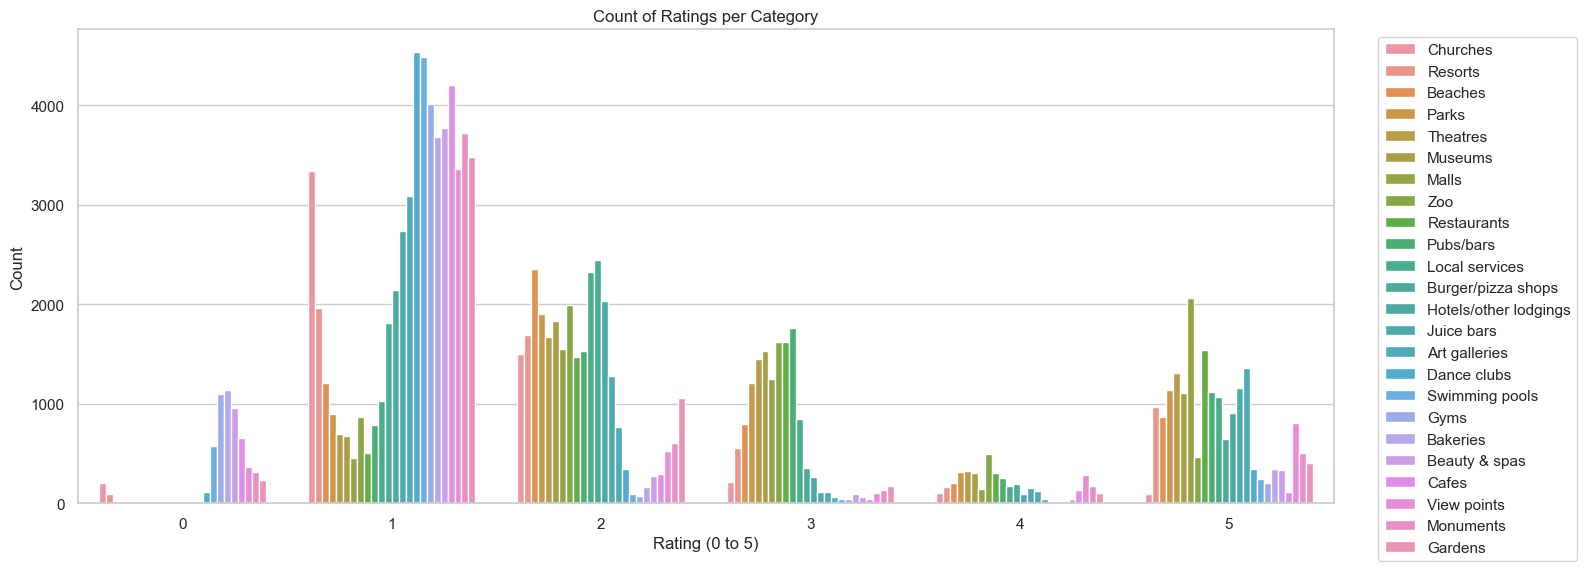

In [19]:
# Crear un countplot incluyendo todas las categorías
plt.figure(figsize=(16, 6))
sns.countplot(data=df_melted, x='Rating', hue='Category') # Clasificando por Ratings

plt.title('Count of Ratings per Category')
plt.xlabel('Rating (0 to 5)')
plt.ylabel('Count')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

Se observa una concentración de calificaciones bajas en muchas categorías. En particular, Beauty & Spa, Dance Clubs, Swimming Pools y Gyms muestran una alta concentración de calificaciones entre 1 y 2. De lo contrario, Malls, Restaurants y Theatres presentan una distribución más equilibrada y una mayor proporción de calificaciones altas (3–5), lo que indica un mejor desempeño. 

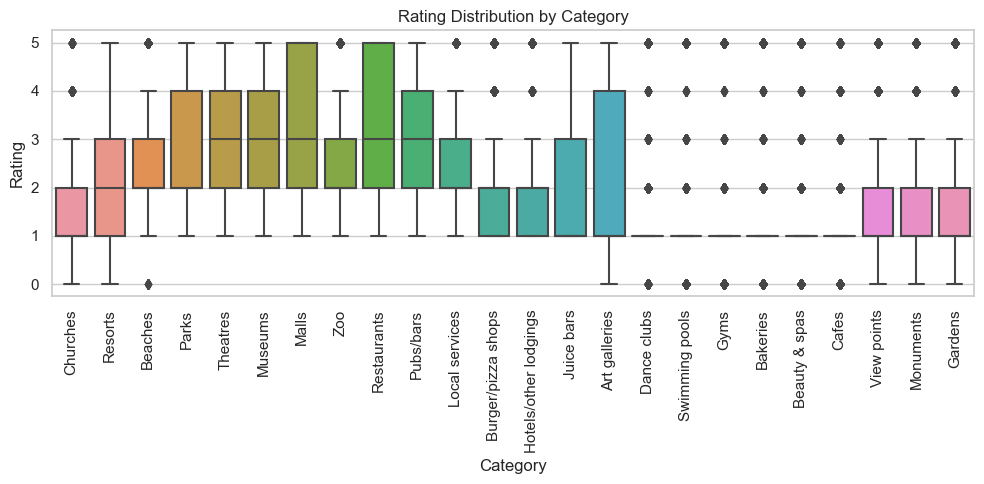

In [20]:
# Crear un boxplot incluyendo todas las categorías
sns.boxplot(data=df_melted, x='Category', y='Rating') # Clasificando por Categoría
plt.xticks(rotation=90)
plt.title('Rating Distribution by Category')
plt.tight_layout()
plt.show()

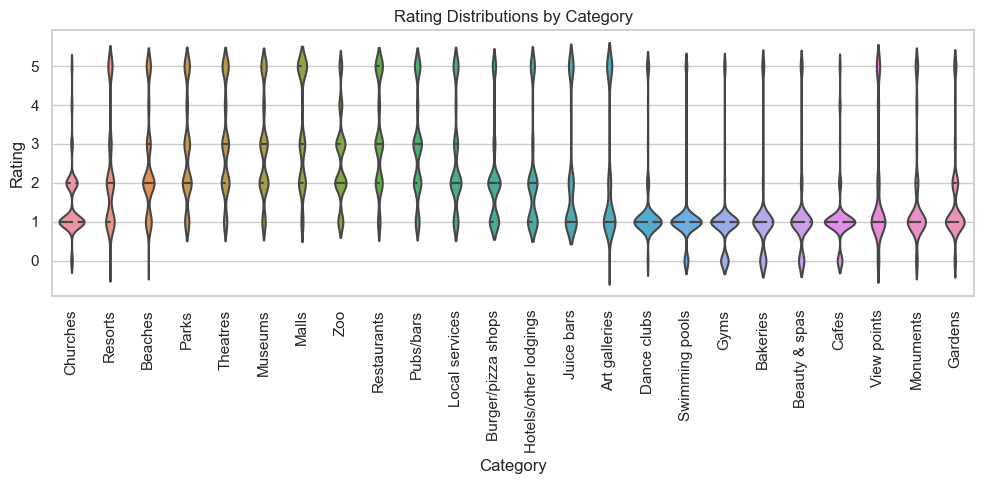

In [21]:
# Crear un violinplot incluyendo todas las categorías, para comparar la distribución de ratings entre las categorías.
sns.violinplot(data=df_melted, x='Category', y='Rating', inner='quartile') # Clasificando por Categoría
plt.xticks(rotation=90)
plt.title('Rating Distributions by Category')
plt.tight_layout()
plt.show()

Esta gráfica muestra la densidad de las valoraciones en cada categoría. Por ejemplo, Malls y Restaurants presentan una mayor concentración de valoraciones de rango medio-alto, mientras que Dance Clubs, Beauty & Spas, Swimming Pools y Gyms concentran la densidad en valores bajos. De igual forma, Cafes y Beauty & Spas muestran una densidad enfocada en las calificaciones más bajas.

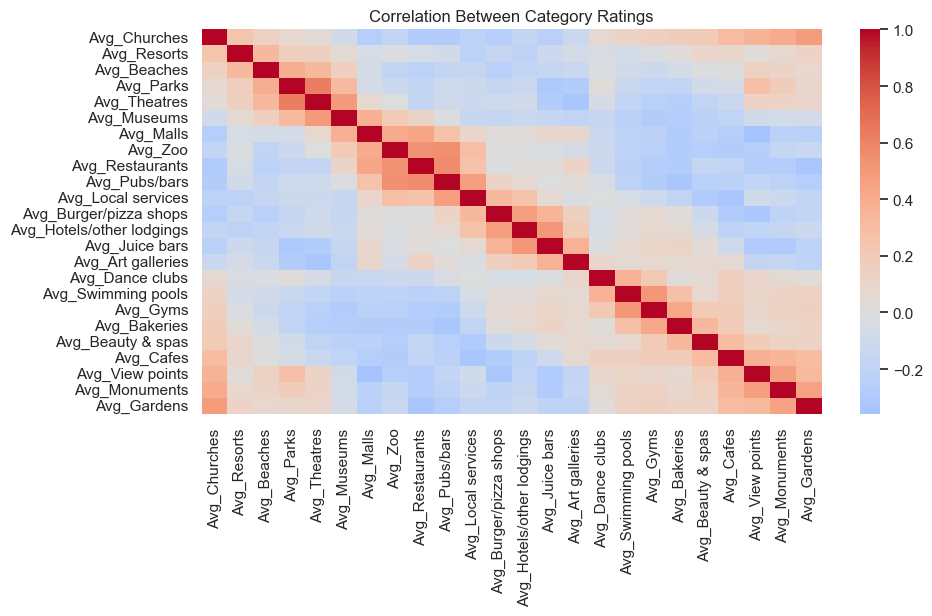

In [23]:
# Visualización con heatmap de la relación entre los ratings de las diferentes categorías.
corr = datos.drop(columns=['Unique user id']).corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Between Category Ratings')
plt.show()

Se observa una correlación marcada entre Malls, Restaurants, Parks y Museums, lo que sugiere que los usuarios los valoran de forma similar. Por su parte, Swimming Pools, Beauty & Spas, Cafes y Dance Clubs presentan correlaciones débiles con el resto, reflejando preferencias más independientes o un desagrado más común. Finalmente, Art Galleries y Juice Bars aparecen aislados, lo que indica gustos muy específicos.

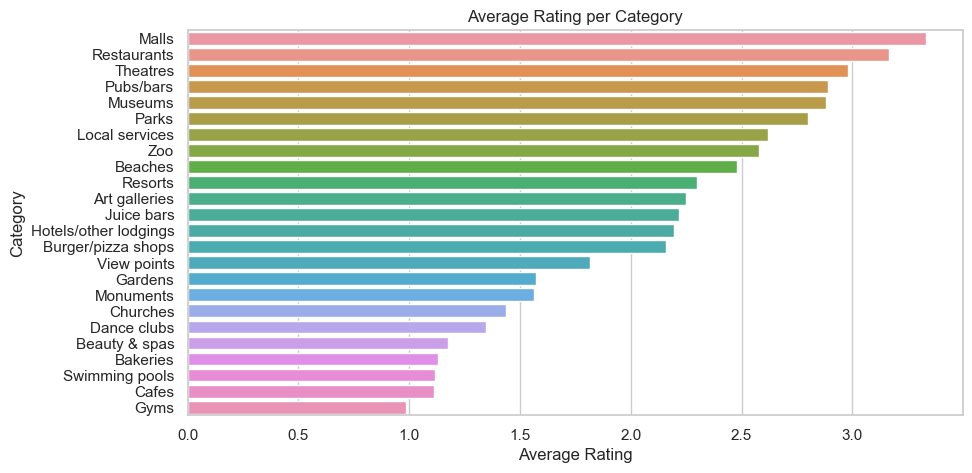

In [24]:
# Crear barplot horizontal relacionando los ratings y todas las categorías.
category_means = df_melted.groupby('Category')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=category_means.values, y=category_means.index)
plt.title('Average Rating per Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

# **5. Machine Learning:**


In [25]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(CNum)

In [26]:
n_clusters = 4  # Try 3-6 and adjust for your case
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
datos['cluster'] = clusters

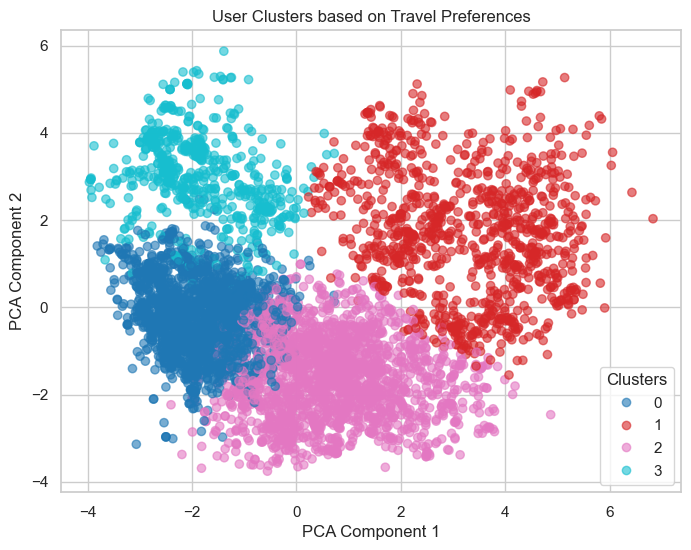

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='tab10', alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("User Clusters based on Travel Preferences")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

In [28]:
import numpy as np

category_names = [
    "churches", "resorts", "beaches", "parks", "theatres", "museums", "malls",
    "zoo", "restaurants", "pubs_bars", "local_services", "burger_pizza_shops", 
    "hotels_other_lodgings", "juice_bars", "art_galleries", "dance_clubs",
    "swimming_pools", "gyms", "bakeries", "beauty_spas", "cafes", "view_points",
    "monuments", "gardens"
]

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

for i, center in enumerate(centroids):
    print(f"\nCluster {i}:")
    top_categories = np.argsort(center)[-3:][::-1]
    print("  Top preferences:", [category_names[j] for j in top_categories])
    bottom_categories = np.argsort(center)[:3]
    print("  Least interested in:", [category_names[j] for j in bottom_categories])
    # Optional: Assign labels based on dominant interests


Cluster 0:
  Top preferences: ['restaurants', 'malls', 'pubs_bars']
  Least interested in: ['gyms', 'bakeries', 'beauty_spas']

Cluster 1:
  Top preferences: ['view_points', 'resorts', 'gardens']
  Least interested in: ['burger_pizza_shops', 'hotels_other_lodgings', 'local_services']

Cluster 2:
  Top preferences: ['theatres', 'parks', 'museums']
  Least interested in: ['gyms', 'bakeries', 'swimming_pools']

Cluster 3:
  Top preferences: ['juice_bars', 'hotels_other_lodgings', 'burger_pizza_shops']
  Least interested in: ['monuments', 'cafes', 'view_points']


In [29]:
cluster_labels = {
    0: "Urban Explorers",
    1: "Travel Basics",
    2: "Culture Seekers",
    3: "Foodie Lovers"
    # ...adjust after analyzing your own centroids!
}

datos['cluster_label'] = datos['cluster'].map(cluster_labels)

In [30]:
from sklearn.metrics import calinski_harabasz_score

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_score = calinski_harabasz_score(X_scaled, kmeans_labels)
print("KMeans CH Score:", kmeans_score)

KMeans CH Score: 767.1371020128546


In [31]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(X_scaled)
agglo_score = calinski_harabasz_score(X_scaled, agglo_labels)
print("Agglomerative Clustering CH Score:", agglo_score)

Agglomerative Clustering CH Score: 677.5861968899375


In [32]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
# Filter noise points for metric
mask = dbscan_labels != -1
if sum(mask) > 1 and len(set(dbscan_labels[mask])) > 1:
    dbscan_score = calinski_harabasz_score(X_scaled[mask], dbscan_labels[mask])
    print("DBSCAN CH Score (excluding noise):", dbscan_score)
else:
    dbscan_score = None
    print("DBSCAN did not form valid clusters for CH scoring.")

DBSCAN CH Score (excluding noise): 110.35313021899066


In [33]:
print("\nComparison:")
print(f"KMeans:         {kmeans_score:.2f}")
print(f"Agglomerative:  {agglo_score:.2f}")
if dbscan_score:
    print(f"DBSCAN:         {dbscan_score:.2f}")
else:
    print("DBSCAN:         N/A (insufficient clusters or all noise)")



Comparison:
KMeans:         767.14
Agglomerative:  677.59
DBSCAN:         110.35


In [34]:
import optuna

def objective(trial):
    n_clusters = trial.suggest_int('n_clusters', 2, 10)
    model = KMeans(n_clusters=n_clusters, random_state=42)
    labels = model.fit_predict(X_scaled)
    score = calinski_harabasz_score(X_scaled, labels)
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
best_clusters = study.best_params['n_clusters']
print(f"\nOptuna best n_clusters: {best_clusters}")

# Fit KMeans with best clusters
opt_kmeans = KMeans(n_clusters=best_clusters, random_state=42)
opt_kmeans_labels = opt_kmeans.fit_predict(X_scaled)
opt_kmeans_score = calinski_harabasz_score(X_scaled, opt_kmeans_labels)
print(f"Optimized KMeans CH Score: {opt_kmeans_score:.2f}")


[I 2025-06-01 14:27:22,890] A new study created in memory with name: no-name-54535f25-8bd1-49d5-a5de-4b801546cf38
[I 2025-06-01 14:27:23,512] Trial 0 finished with value: 627.3549052018323 and parameters: {'n_clusters': 6}. Best is trial 0 with value: 627.3549052018323.
[I 2025-06-01 14:27:24,150] Trial 1 finished with value: 584.0691499867282 and parameters: {'n_clusters': 7}. Best is trial 0 with value: 627.3549052018323.
[I 2025-06-01 14:27:24,750] Trial 2 finished with value: 627.3549052018323 and parameters: {'n_clusters': 6}. Best is trial 0 with value: 627.3549052018323.
[I 2025-06-01 14:27:25,410] Trial 3 finished with value: 515.961472420156 and parameters: {'n_clusters': 9}. Best is trial 0 with value: 627.3549052018323.
[I 2025-06-01 14:27:26,030] Trial 4 finished with value: 676.7661023750295 and parameters: {'n_clusters': 5}. Best is trial 4 with value: 676.7661023750295.
[I 2025-06-01 14:27:26,744] Trial 5 finished with value: 515.961472420156 and parameters: {'n_clusters


Optuna best n_clusters: 2
Optimized KMeans CH Score: 907.26


In [35]:
print("\nSummary Table")
print(f"{'Model':<20}{'Clusters':<10}{'CH Score':<10}")
print(f"{'KMeans':<20}{4:<10}{kmeans_score:.2f}")
print(f"{'Agglomerative':<20}{4:<10}{agglo_score:.2f}")
if dbscan_score:
    print(f"{'DBSCAN':<20}{'Varies':<10}{dbscan_score:.2f}")
else:
    print(f"{'DBSCAN':<20}{'N/A':<10}{'N/A'}")
print(f"{'Optuna KMeans':<20}{best_clusters:<10}{opt_kmeans_score:.2f}")



Summary Table
Model               Clusters  CH Score  
KMeans              4         767.14
Agglomerative       4         677.59
DBSCAN              Varies    110.35
Optuna KMeans       2         907.26


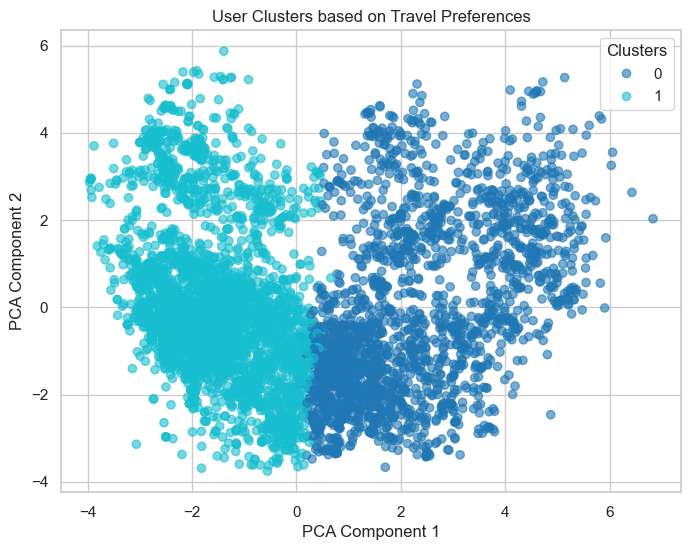

In [36]:
n_clusters = 2  # Optuna resultado
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
datos['cluster'] = clusters

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='tab10', alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("User Clusters based on Travel Preferences")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

In [37]:
import numpy as np

category_names = [
    "churches", "resorts", "beaches", "parks", "theatres", "museums", "malls",
    "zoo", "restaurants", "pubs_bars", "local_services", "burger_pizza_shops", 
    "hotels_other_lodgings", "juice_bars", "art_galleries", "dance_clubs",
    "swimming_pools", "gyms", "bakeries", "beauty_spas", "cafes", "view_points",
    "monuments", "gardens"
]

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

for i, center in enumerate(centroids):
    print(f"\nCluster {i}:")
    top_categories = np.argsort(center)[-3:][::-1]
    print("  Top preferences:", [category_names[j] for j in top_categories])
    bottom_categories = np.argsort(center)[:3]
    print("  Least interested in:", [category_names[j] for j in bottom_categories])
    # Optional: Assign labels based on dominant interests


Cluster 0:
  Top preferences: ['parks', 'theatres', 'beaches']
  Least interested in: ['gyms', 'swimming_pools', 'cafes']

Cluster 1:
  Top preferences: ['malls', 'restaurants', 'pubs_bars']
  Least interested in: ['gyms', 'bakeries', 'cafes']
